# Week 2

In this lab session we will see explore in more detail the following:
- Linear Regression
- Using linear regression on real world data
- Difference of Overfitting and Underfitting
- Gradient Descent
- Batch Gradient Descent
- Stochastic Gradient Descent
- Polynomial Regression
- Logistic Regression

You should be familiar with the above topics from the course lectures. So we will focus mainly on the implementation in code.

# Linear Regression

We will start this demonstration with a simple implementation of Linear Regression for demonstrative purposes.

In [1]:
import numpy as np
#Generate random dataset
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)
X_new = np.array([[0], [2]])

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.55096698],
       [10.40722835]])

Remember to use the `%matplotlib inline` to use the `matplotlib` library inside Jupyter Notebooks

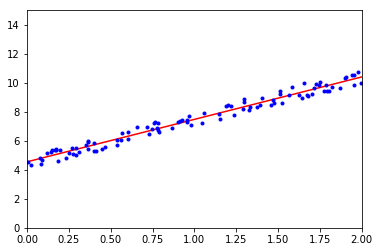

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

## Exercise

Why are we using formula `y =  offset *X * np.random.rand(50,1) + (offset-X*offset/2)` to generate new dataset?
Because it closely reassembles real life accuracy of prediction over time (for example weather).

- Task 1: plot the data
- Task 2: calculate linear regession for this dataset and plot it
- Task 3: how can we increase accuracy? Try adding more points 

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

offset = 8

X = 2 * np.random.rand(50, 1)
y =  offset *X * np.random.rand(50,1) + (offset-X*offset/2)

## Exercise

- Can we use linear regression for non linear functions?
- What are the issues with this approach?


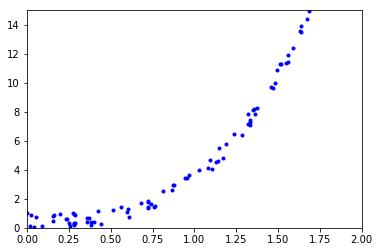

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100, 1)
y =  3 * np.power(X,3) + np.random.rand(100,1)

plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

We can do the same using **Scikit-Learn** faster and better.

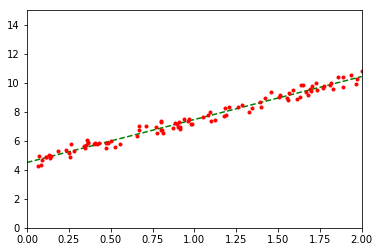

In [7]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
%matplotlib inline

#Reset the dataset
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)
X_new = np.array([[0], [2]])

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
y_predict = lin_reg.predict(X_new)

plt.plot(X_new, y_predict, "g--")
plt.plot(X, y, "r.")
plt.axis([0,2,0,15])
plt.show()

# Linear Regression on real data

To train a Linear Regression classifier on real life data, we will be using the `diabetes` dataset publicly available and visualising the resulted value of `theta`.

## Exercise
Split the dataset into training and testing portions. Testing dataset should be around 200 elements.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

### Exercise ###

### Your code here ###

### Exercise END ###

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
print(diabetes_y_pred[1])

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='r')
plt.plot(diabetes_X_test, diabetes_y_pred, color='g', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

NameError: name 'diabetes_X_train' is not defined

# Underfitting and Overfitting

The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called **underfitting**.  
A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will **overfit** the training data, i.e. it learns the noise of the training data.  
We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the **mean squared error (MSE)** on the validation set, the higher, the less likely the model generalizes correctly from the training data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Gradient Descent

This is an algorithm capable of finding optimal solutions to a wide range of problems.  
The parameters are tweaked to minimise the cost function.

However it is important to make sure that the **learning rate** is tweaked to an optimal value. Otherwise we can end up in a situation where the "step" is too small or too large. The undesired effects of that are as seen on the illustration below.

![Gradient Descent](https://raw.githubusercontent.com/wOOL/COM2028/master/W4/gd.png)

In addition, the cost functions very rarely look orderly like the ones used for demonstration pruposes above. Usually the have a complex shape.

This poses a new challenge - to avoid the Local minimum.

![Local Minimum](https://raw.githubusercontent.com/wOOL/COM2028/master/W4/local_min.png)

# Batch Gradient Descent

Batch Gradient Descent, also called vanilla gradient descent, calculates the error for each example within the training dataset, but only after all training examples have been evaluated, the model gets updated. This whole process is like a cycle and called a training epoch.

Advantages of it are that it’s computational efficient, it produces a stable error gradient and a stable convergence. Batch Gradient Descent has the disadvantage that the stable error gradient can sometimes result in a state of convergence that isn’t the best the model can achieve. It also requires that the entire training dataset is in memory and available to the algorithm.

In [ ]:
eta =  0.1
n_iterations = 1000
m = 100

#Generate random dataset
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)
X_new = np.array([[0], [2]])
X_b = np.c_[np.ones((100, 1)), X]
X_new_b = np.c_[np.ones((2,1)), X_new]


theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

In [ ]:
X_new_b.dot(theta)

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

## Exercise 
Modify the method above to plot every 100th iteration instead of first ten.

In [ ]:
# Your code here

Observe the effect different learning rate values have on the training process.

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

# Stochastic Gradient Descent

The Stochastic Gradient Descent approach picks a random instance in the training set at every step and computes the gradients based on that single distance.

This makes the algorithm much faster than other approaches. Due to the stochastic nature of this algorithm it will continue to bounce even when reaching very close to the minimum and never settle down. What this means that the solution found is close to the optimal solution, but not optimal.

In [ ]:
#Generate random dataset
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)
X_new = np.array([[0], [2]])
X_b = np.c_[np.ones((100, 1)), X]
X_new_b = np.c_[np.ones((2,1)), X_new]


theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [ ]:
# Code Implementation
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)          
            style = "b-" if i > 0 else "r--"      
            plt.plot(X_new, y_predict, style)    
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)              
plt.ylabel("$y$", rotation=0, fontsize=18)       
plt.axis([0, 2, 0, 15])                        
plt.show()                                     

In [ ]:
theta

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

# Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an n-th degree polynomial.  

Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted `E(y |x)`

If you need more information please read the following article in full:
https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/

In [ ]:
# Generate some data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Now that we have generated data, we can plot it for better visualisation.

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

In [ ]:
X_poly[0]

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

We are now ready to plot our predictions.

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Need to consider which degree is most suitable, avoid **overfit** or **underfit**.

**Advantages** of using Polynomial Regression:

- Broad range of function can be fit under it.
- Polynomial basically fits wide range of curvature.
- Polynomial provides the best approximation of the relationship between dependent and independent variable.

**Disadvantages** of using Polynomial Regression

- These are too sensitive to the outliers.
- The presence of one or two outliers in the data can seriously affect the results of a nonlinear analysis.
- In addition there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# Logistic Regression

The output for linear regression is a number that has its real meaning. Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class.

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

The output for a logistic regression is a number that represents the probability of the event happening. Logistic regression is to transform the output of a linear regression which has a wider range, to a range that probability lies in [0,1]. The transformation formula is logit that maps a value to a number in the range of [0,1].

Now we will load the **Iris plants dataset** and explore the implementation on a real dataset.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

In [ ]:
print(iris.DESCR)

In [ ]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

Decision boundary helps to differentiate probabilities into positive class and negative class.  

**Linear Decision Boundary**
![Decision Boundary](https://raw.githubusercontent.com/wOOL/COM2028/master/W4/db_linear.jpeg)

**Non Linear Decision Boundary**
![Decision Boundary](https://raw.githubusercontent.com/wOOL/COM2028/master/W4/db_non_linear.jpeg)
https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102


In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [ ]:
decision_boundary

In [ ]:
log_reg.predict([[1.7], [1.5]])

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [ ]:
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]])